In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing()

In [2]:
def curl_sym(u, v, w, x, y, z):
    """
    Returns the symbolic curl of a vector field.
    """
    curl_x = sp.diff(v, z) - sp.diff(w, y)
    curl_y = sp.diff(w, x) - sp.diff(u, z)
    curl_z = sp.diff(u, y) - sp.diff(v, x)
    return curl_x, curl_y, curl_z

In [3]:
x_sym, y_sym, z_sym = sp.symbols('x y z')

# Define 2D velocity field
u_sym = -sp.cos(2*sp.pi*x_sym)*sp.sin(2*sp.pi*y_sym)
v_sym = sp.sin(2*sp.pi*x_sym)*sp.cos(2*sp.pi*y_sym)

u_sym, v_sym

In [4]:
omega_sym = curl_sym(u_sym, v_sym, 0, x_sym, y_sym, z_sym)
omega_sym

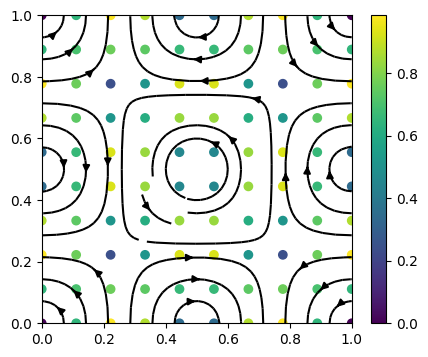

In [14]:
# Define 2D velocity field
_x = np.linspace(0, 1, 10)
x, y = np.meshgrid(_x, _x)
u = -np.cos(2*np.pi*x)*np.sin(2*np.pi*y)
v = np.sin(2*np.pi*x)*np.cos(2*np.pi*y)
vmag = np.sqrt(u**2 + v**2)

# Plot velocity magnitude
plt.figure(figsize=(5, 4))
plt.scatter(x, y, c=vmag, cmap='viridis')
plt.colorbar()
plt.streamplot(x, y, u, v, color='k', density=0.5)

In [22]:
u

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00],
       [-6.42787610e-01, -4.92403877e-01, -1.11618897e-01,
         3.21393805e-01,  6.04022774e-01,  6.04022774e-01,
         3.21393805e-01, -1.11618897e-01, -4.92403877e-01,
        -6.42787610e-01],
       [-9.84807753e-01, -7.54406507e-01, -1.71010072e-01,
         4.92403877e-01,  9.25416578e-01,  9.25416578e-01,
         4.92403877e-01, -1.71010072e-01, -7.54406507e-01,
        -9.84807753e-01],
       [-8.66025404e-01, -6.63413948e-01, -1.50383733e-01,
         4.33012702e-01,  8.13797681e-01,  8.13797681e-01,
         4.33012702e-01, -1.50383733e-01, -6.63413948e-01,
        -8.66025404e-01],
       [-3.42020143e-01, -2.62002630e-01, -5.93911746e-02,
         1.71010072e-01,  3.21393805e-01,  3.21393805e-01,
         1.71010072e-01, -5.93911746e-02, -2.62002630e-01,
        -3.

In [30]:
np.gradient(u.ravel(), y.ravel(), edge_order=2)

c:\Users\prajw\miniconda3\envs\dev311\Lib\site-packages\numpy\lib\function_base.py:1240: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\prajw\miniconda3\envs\dev311\Lib\site-packages\numpy\lib\function_base.py:1240: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\prajw\miniconda3\envs\dev311\Lib\site-packages\numpy\lib\function_base.py:1241: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\prajw\miniconda3\envs\dev311\Lib\site-packages\numpy\lib\function_base.py:1241: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\prajw\miniconda3\envs\dev311\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\prajw\miniconda3\envs\dev311\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: invalid value encountered

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [28]:
def curl_numerical(x, y, u, v):
    """
    Returns the curl of a vector field.
    """
    u, v = u.ravel(), v.ravel()
    x, y = x.ravel(), y.ravel()

    du_dy = np.gradient(u, y, edge_order=2)
    dv_dx = np.gradient(v, x, edge_order=2)
    return dv_dx - du_dy


In [29]:
omega = curl_numerical(x,y,u,v)
omega

c:\Users\prajw\miniconda3\envs\dev311\Lib\site-packages\numpy\lib\function_base.py:1240: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\prajw\miniconda3\envs\dev311\Lib\site-packages\numpy\lib\function_base.py:1240: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\prajw\miniconda3\envs\dev311\Lib\site-packages\numpy\lib\function_base.py:1241: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\prajw\miniconda3\envs\dev311\Lib\site-packages\numpy\lib\function_base.py:1241: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\prajw\miniconda3\envs\dev311\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\prajw\miniconda3\envs\dev311\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: invalid value encountered

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])